In [1]:
from PYmodule import *
from PYmodule.models_logd import *
%matplotlib inline

# tau=14, 18, 37 (f2/ 16 tile, best fit, 84 tile)

f_seed = 0.01
ts = [14, 18, 37]

# f_seed = 0.1
# ts = [10, 20, 50]

f_seedlabel = 'f%d'%abs(int(np.log10(f_seed)))

readprex = z6datapre+f_seedlabel+'Phi_easy'
prex = '../' + f_seedlabel


In [2]:
len(bin_cen), len(Phi_obs), readprex, f_seed, ts

(12, 12, '../z6/data/f2Phi_easy', 0.01, [14, 18, 37])

NameError: name 'med_model' is not defined

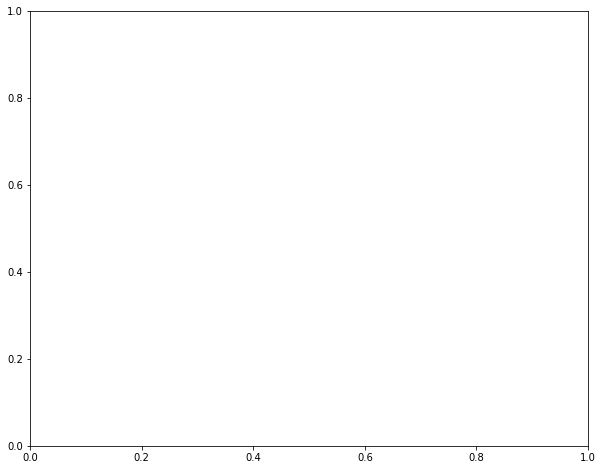

In [2]:
curve_name = 'LF'
f_seedlabel = 'f%d'%abs(int(np.log10(f_seed)))
fLname = datapre+f_seedlabel+'ndraw60'+curve_name
T_ = ascii.read(fLname, guess=False, delimiter=' ')

xs = T_['xs']
x_data = T_['x_data']
y_data = T_['y_data']
y_data_err = T_['y_data_err']
y_best = T_['y_best']



fig, ax = plt.subplots(figsize=(10, 8))
ax.fill_between(xs,(med_model-spread)/1e9,(med_model+spread)/1e9,color='grey',alpha=0.3,label='_',zorder=5)
ax.plot(xs, y_best/1e9, c='black', label='_best fit')
ax.plot(xs, y_best/1e9*corr_U14D20(xs),'--', c='black', label='_best fit w/o obscuration correction',zorder=5)



<Table length=170>
 name  dtype 
----- -------
M1450 float64
  Phi float64
Phi_U float64
Phi_M float64

<Table length=110>
 name  dtype 
----- -------
M1450 float64
  Phi float64
Phi_U float64
Phi_M float64

<Table length=170>
 name  dtype 
----- -------
M1450 float64
  Phi float64
Phi_U float64
Phi_M float64



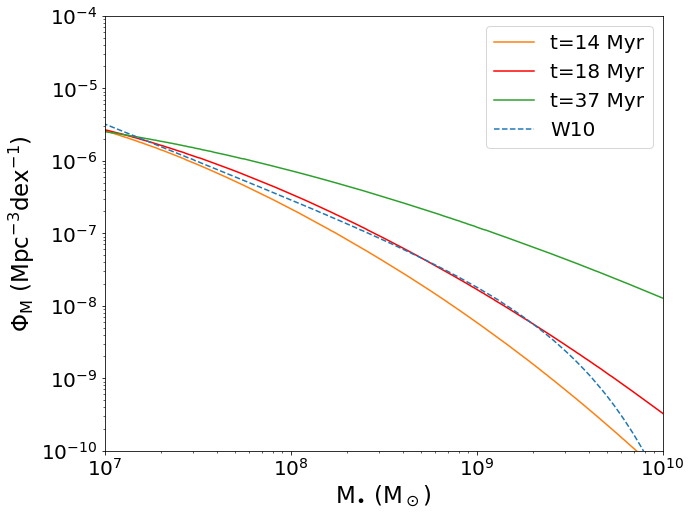

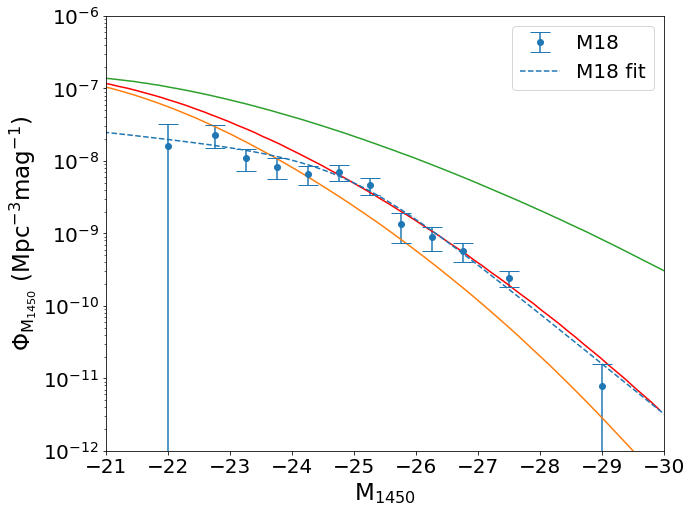

In [3]:

colors = ['C1','red','C2']
figm = plt.figure(num='MF',figsize=(10, 8))
axm = figm.add_subplot(1, 1, 1)
figl = plt.figure(num='LF',figsize=(10, 8))
axl = figl.add_subplot(1, 1, 1)

for i in range(len(ts)):
    t = ts[i]
    MFname = readprex +'MFt{:d}'.format(int(t))
    LFname = readprex +'LFt{:d}'.format(int(t))
    TM = ascii.read(MFname, guess=False, delimiter=' ')
    TL = ascii.read(LFname, guess=False, delimiter=' ')
    print(TL.info)
    axm.plot(M_BH, TM['Phi'],c=colors[i], label='t=%d Myr'%t)
    axl.plot(TL['M1450'], TL['Phi_U']/1e9,c=colors[i], label='_t=%d Myr'%t)

# Willott 2010; data
axm.plot(M_BH, TM['W10_MF'],'--',c='C0',label='W10')
    
# Matsuoka 2018; data(errorbar) + fitting curve
p1=axl.errorbar(x_data, y_data/1e9, yerr=y_data_err/1e9,fmt='o',capsize=10, label='M18')
p2,=axl.plot(xs,LF_M1450(xs),'--',c='C0',label='M18 fit')


axm.set_xlim(1e7,1e10); axm.set_xscale('log')
axm.set_ylim(1e-10,1e-4); axm.set_yscale('log')
axm.set_xlabel(r'$\mathrm{M_{\bullet}~(M_\odot)}$',fontsize=fslabel)
axm.set_ylabel(r'$\mathrm{\Phi_M~(Mpc^{-3}dex^{-1})}$',fontsize=fslabel)
axm.legend(fontsize=fslegend)
axm.tick_params(labelsize=fstick)
figm.savefig(figpre+'%sMFtau.pdf'%f_seedlabel,dpi=400,bbox_inches='tight')

axl.set_xlim(-21,-30)
axl.set_ylim(1e-12,1e-6)
axl.set_yscale('log')
# axl.legend(fontsize=fslegend)
axl.legend([p1,p2],['M18','M18 fit'],fontsize=fslegend)
axl.set_xlabel(r'$\mathrm{M_{1450}}$',fontsize=fslabel)
axl.set_ylabel(r'$\mathrm{\Phi_{M_{1450}}~(Mpc^{-3}mag^{-1})}$',fontsize=fslabel)
axl.tick_params(labelsize=fstick)
figl.savefig(figpre+'%sLFtau.pdf'%f_seedlabel,dpi=400,bbox_inches='tight')

In [4]:
TL

M1450,Phi,Phi_U,Phi_M
float64,float64,float64,float64
-31.95,0.0408,0.0327,0.0358
-31.85,0.0464,0.0371,0.0406
-31.75,0.0526,0.0421,0.0461
-31.65,0.0596,0.0477,0.0521
-31.55,0.0674,0.0539,0.0589
-31.45,0.0761,0.0609,0.0665
-31.35,0.0859,0.0687,0.075
-31.25,0.0969,0.0775,0.0845
-31.15,0.109,0.0873,0.0951
